# manueverMotifs - plots generator for the paper

### Maria Inês Silva
### 28/02/2019

***

In [1]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from extendedMD.emd import find_motifs_from_emd
from extendedMD.viz import create_motif_table
from extendedMD.pruning import prune_motifs_with_mdl

# local code
import sys
import os
sys.path.insert(0, os.path.abspath('../scripts'))
import uah_utils
import motif_utils
import lon_viz
import lat_viz

In [2]:
cwd = os.getcwd()
data_folder = os.path.abspath(os.path.join(cwd, os.pardir, 'data-uah/D6'))
driver_df = uah_utils.get_full_point_uah_data(data_folder)

***

## 1. Identifying brakes and accelerations in the longitudinal acceleration

In [3]:
trip_df = driver_df[driver_df['trip_id']=='20151221120051']
ts = trip_df['az'].values
events_ts = trip_df['event_type'].values

output_folder = os.path.abspath(os.path.join(cwd, os.pardir, 'data-motifs'))
motif_file_name = 'motif_lon_acc_aggressive_trip.p'

motif_dic_list = pickle.load(open(os.path.join(output_folder, motif_file_name), 'rb'))
pruned_motif_dic_list = prune_motifs_with_mdl(ts, motif_dic_list, 0.1)

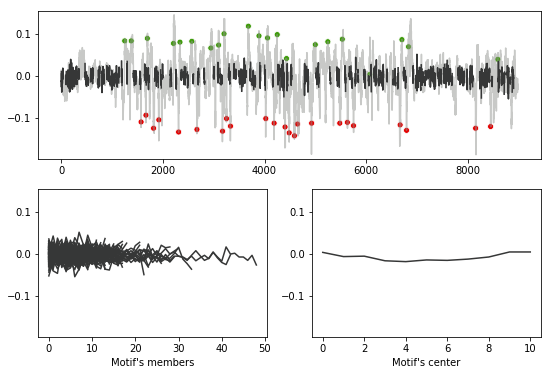

In [4]:
motif_dic = pruned_motif_dic_list[0]
lon_viz.plot_single_lon_motif_for_paper(ts, events_ts, motif_dic)
plt.savefig('lon_agg_nomanu.png')

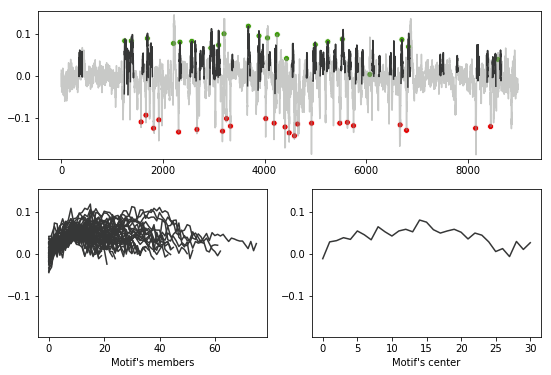

In [5]:
motif_dic = pruned_motif_dic_list[1]
lon_viz.plot_single_lon_motif_for_paper(ts, events_ts, motif_dic)
plt.savefig('lon_agg_acc.png')

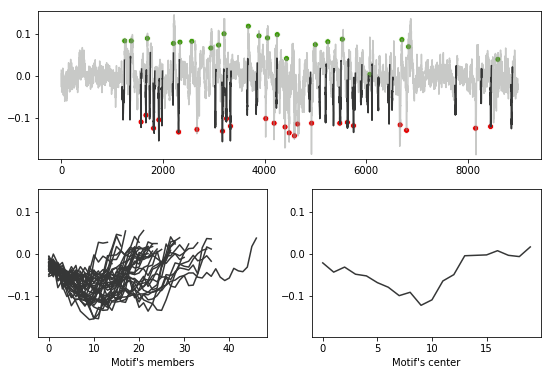

In [6]:
motif_dic = pruned_motif_dic_list[2]
lon_viz.plot_single_lon_motif_for_paper(ts, events_ts, motif_dic)
plt.savefig('lon_agg_brak.png')

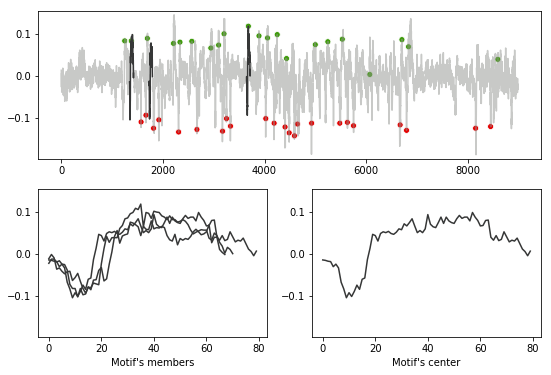

In [7]:
motif_dic = pruned_motif_dic_list[4]
lon_viz.plot_single_lon_motif_for_paper(ts, events_ts, motif_dic)
plt.savefig('lon_agg_ba.png')

In [8]:
trip_df = driver_df[driver_df['trip_id']=='20151217164730']
ts = trip_df['az'].values
events_ts = trip_df['event_type'].values

output_folder = os.path.abspath(os.path.join(cwd, os.pardir, 'data-motifs'))
motif_file_name = 'motif_lon_acc_drowsy_trip.p'

motif_dic_list = pickle.load(open(os.path.join(output_folder, motif_file_name), 'rb'))

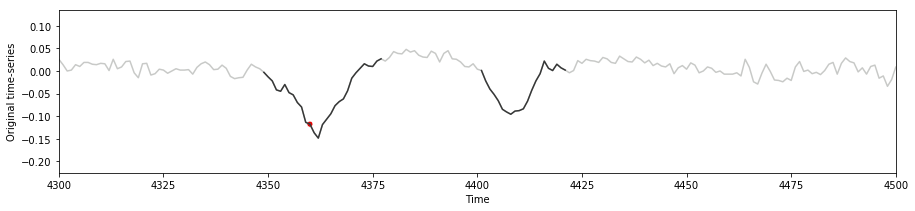

In [9]:
motif_index = motif_utils.return_motif_index_with_pattern(motif_dic_list, ['aa', 'ac', 'ad'])
motif_dic = motif_dic_list[motif_index]
lon_viz.plot_zoomin_lon_motif(ts, motif_dic, events_ts,  [4300, 4500])
plt.savefig('lon_dro_zoom.png')

***

## 2. Identifying turns in the lateral acceleration

In [10]:
trip_df = driver_df[driver_df['trip_id']=='20151221120051']
ts = trip_df['ay'].values
events_ts = trip_df['event_type'].values

output_folder = os.path.abspath(os.path.join(cwd, os.pardir, 'data-motifs'))
motif_file_name = 'motif_lat_acc_aggressive_trip.p'

motif_dic_list = pickle.load(open(os.path.join(output_folder, motif_file_name), 'rb'))
pruned_motif_dic_list = prune_motifs_with_mdl(ts, motif_dic_list, 0.1)

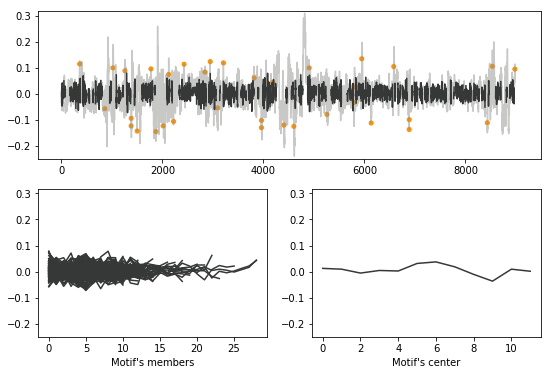

In [11]:
motif_dic = pruned_motif_dic_list[0]
lat_viz.plot_single_lat_motif_for_paper(ts, events_ts, motif_dic)
plt.savefig('lat_agg_nomanu.png')

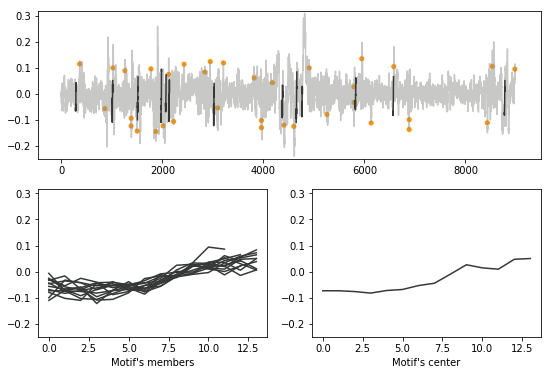

In [12]:
motif_dic = pruned_motif_dic_list[1]
lat_viz.plot_single_lat_motif_for_paper(ts, events_ts, motif_dic)
plt.savefig('lat_agg_twi.png')

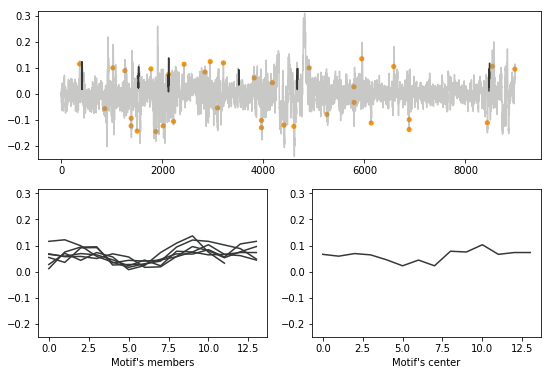

In [13]:
motif_dic = pruned_motif_dic_list[3]
lat_viz.plot_single_lat_motif_for_paper(ts, events_ts, motif_dic)
plt.savefig('lat_agg_left.png')

In [14]:
trip_df = driver_df[driver_df['trip_id']=='20151217164730']
ts = trip_df['ay'].values
events_ts = trip_df['event_type'].values

output_folder = os.path.abspath(os.path.join(cwd, os.pardir, 'data-motifs'))
motif_file_name = 'motif_lat_acc_drowsy_trip.p'

motif_dic_list = pickle.load(open(os.path.join(output_folder, motif_file_name), 'rb'))
pruned_motif_dic_list = prune_motifs_with_mdl(ts, motif_dic_list, 0.1)

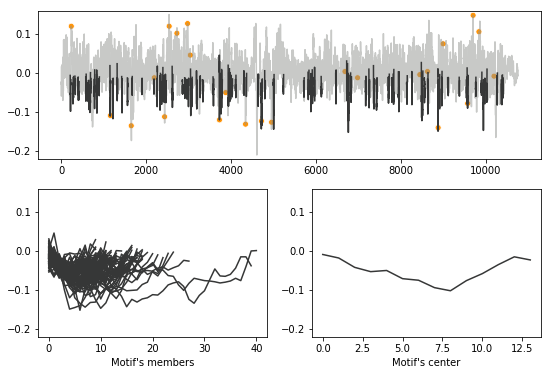

In [15]:
motif_dic = pruned_motif_dic_list[1]
lat_viz.plot_single_lat_motif_for_paper(ts, events_ts, motif_dic)
plt.savefig('lat_dro_right.png')